In [1]:
import os
import glob
import collections
import soundfile as sf
import librosa
import IPython.display as ipd
import matplotlib.pyplot as plt
import librosa.display
import numpy as np

In [21]:
root = os.path.join('Gitarre-monophon', 'Samples')

dir_noFX = os.path.join(root, 'NoFX')
dir_effect = os.path.join(root, 'Distortion')
path_data = 'data'

In [3]:
list_noFX = glob.glob(os.path.join(dir_noFX, '*.wav'))
list_effect = glob.glob(os.path.join(dir_effect, '*.wav'))

print('files in noFX:  ', len(list_noFX))
print('files in effect:', len(list_effect))

files in noFX:   624
files in effect: 1872


In [4]:
effect_str = '4411' 
pair_dict = collections.defaultdict(dict)

# noFX
for idx, file in enumerate(list_noFX):
    fn = os.path.basename(file)
    unique_key = fn[:9]
    pair_dict[unique_key]['x'] = file

# effect
for idx, file in enumerate(list_effect):
    fn = os.path.basename(file)
    unique_key = fn[:9]
    pair_dict[unique_key]['y'] = file
    
# sanity check
pair_list = []
for k, v in pair_dict.items():
    entry = {
        'setting': k,
        'x': v['x'],
        'y': v['y'],
    }
    pair_list.append(entry)
    
pair_list.sort(key=lambda x: x['setting'])
print('number of pairs:', len(pair_list))
print('\nSample:\n', pair_list[0])

number of pairs: 624

Sample:
 {'setting': 'G61-40100', 'x': 'Gitarre-monophon/Samples/NoFX/G61-40100-1111-20593.wav', 'y': 'Gitarre-monophon/Samples/Distortion/G61-40100-4411-37441.wav'}


In [22]:
# train/test split
num_pair = len(pair_list)
ratio_test = 0.1
rand_order = np.random.permutation(num_pair) 
test_idx = rand_order[:int(num_pair * ratio_test)]
train_idx = rand_order[int(num_pair * ratio_test):]

for idx in train_idx:
    pair_list[idx]['is_train'] = True
for idx in test_idx:
    pair_list[idx]['is_train'] = False

wav_x: (32001,)
wav_y: (32001,)
is_train: True


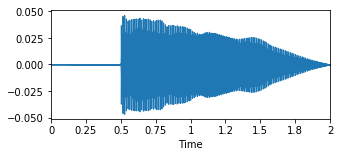

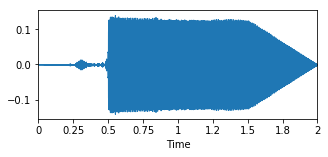

In [23]:
pair = pair_list[0]
file_x = pair['x']
file_y = pair['y']

# wav_x, sr = sf.read(file_x)
# wav_y, sr = sf.read(file_y)
sr = 16000
wav_x, _ = librosa.load(file_x, sr=sr)
wav_y, _ = librosa.load(file_y, sr=sr)
print('wav_x:', wav_x.shape)
print('wav_y:', wav_y.shape)
print('is_train:', pair['is_train'])

# display
plt.figure(figsize=(5, 2))
librosa.display.waveplot(wav_x, sr=sr)
plt.figure(figsize=(5, 2))
librosa.display.waveplot(wav_y, sr=sr)

# for i in range(0, ken(wav))

In [6]:
# play
ipd.Audio(wav_y, rate=sr)

In [10]:
win_len = 1024
hop_len = 64
cnt = 0
path_samples = os.path.join('data', 'samples')

# fidx = 20
for fidx in range(len(pair_list)):
    if fidx > 1:
        break
        
    print(' > ', fidx)
    pair = pair_list[fidx]
    file_x = pair['x']
    file_y = pair['y']

    # wav_x, sr = sf.read(file_x)
    # wav_y, sr = sf.read(file_y)
    sr = 16000
    wav_x, _ = librosa.load(file_x, sr=sr)
    wav_y, _ = librosa.load(file_y, sr=sr)
    print('wav_x:', wav_x.shape)
    print('wav_y:', wav_y.shape)

    for i in range(0, len(wav_x), hop_len):
        st = i 
        ed = i + win_len
    
        fn = '{}_{}_{}.npz'.format(pair['setting'], st, ed)
        path_out = os.path.join(path_samples, fn)
        np.savez(
            path_out, 
            x=wav_x[st:ed],
            y=wav_y[st:ed])
        
        cnt += 1
        
print('num of samples:', cnt)

 >  0
wav_x: (32001,)
wav_y: (32001,)
 >  1
wav_x: (32001,)
wav_y: (32001,)
num of samples: 1002


In [11]:
tmpfile = np.load('/Users/wayne391/Documents/Projects/audio_effect/data/samples/G61-40100_11712_12736.npz')